# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Пасечник М.В. Вариант №17

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.



## Основные теоретические положения

**Линейная регриессионная модель:**

$$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta $$

**Статистическая модель**
$$\mathbb{E}_{\theta}(Y|z) = X^{\intercal}\beta , \mathrm{Var}(Y|z) = \sigma^2 \mathrm{E}$$

**Регрессионная модель:**

$$\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$$

**Метод наименьших квадратов:**
$$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$$

**Нормальные уравнения:** $$XX^\intercal\beta=XY$$

**Решение системы нормальных уравнений в регулярном случае:** $$\hat{\beta}=(XX^\intercal)^{-1}XY$$


**Оценка параметра $\sigma^2$** $$s^2 \frac{RSS(\widehat\beta)}{n-r}=\frac{SSe}{n-r}$$

**Доверительный эллипс для параметра $(\beta_0, \beta_1)$:**

**ДНО-функция:** $$\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$$

**МНК оценка** $$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$$

**Доверительный эллипс:** $$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

**F - статистика:**  $$\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $$



## Постановка задачи

Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$
 от переменной $X$
. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [45]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sympy

In [46]:
alpha = 0.02
h = 2.30

X = [3, 6, 6, 4, 5, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 1, 1, 3, 3, 4,
     4, 2, 3, 2, 3, 3, 2, 4, 1, 5, 3, 5, 1, 4, 5, 5, 5, 4, 4, 4, 4, 4, 2, 2, 2]

Y = [20.85, 15.67, 15.43, 15.52, 8.33, 13.00, 17.05, 5.52, 7.98, 22.25, 16.68,
     17.77,13.06, 12.86, 11.24, 6.62, 8.70, 17.94, 25.22, 16.08, 12.05, 15.63,
     6.96, 15.17, 15.54, 0.88, 10.77, 18.33, 4.06, 14.51, 14.06, 14.38, 14.71,
     12.42, 9.81, 13.82, 11.85, 10.65, 8.18, 10.09, 5.00, 5.79, 14.90, 9.00,
     3.81, 10.21, 11.97, 14.15, 16.79, 26.29]

n = len(X)

In [47]:
data = {'X': X, 'Y': Y}
data = pd.DataFrame(data)

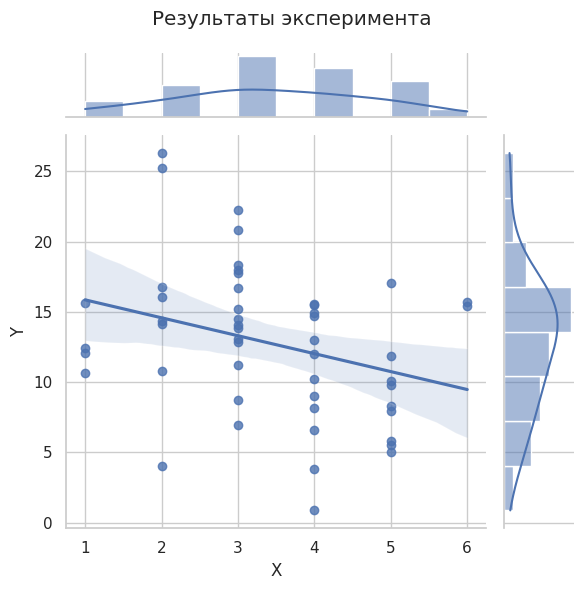

In [48]:
sns.set_theme(style='whitegrid')
p = sns.jointplot(x = 'X', y = 'Y', data = data, kind="reg")
p.fig.suptitle("Результаты эксперимента")
p.fig.tight_layout()

**Линейная регрессионная модель имеет вид:**

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \varepsilon$

**Построение МНК оценок:**

$RSS(\beta) = \left(Y-X^{\intercal}\beta\right)^{\intercal} \left(Y-X^{\intercal}\beta\right) \to \min_\beta $

In [49]:
X = np.array(data['X']).reshape(-1,1)
Y = np.array(data['Y'])

model = LinearRegression().fit(X, Y)

b0 = model.intercept_
b1 = model.coef_

print('betta_0 =',b0 ,'betta_1 =', b1[0])

betta_0 = 17.127243902439023 betta_1 = -1.2753658536585366


In [50]:
y_pred1 = model.predict(X)

y_pred1

array([13.30114634,  9.47504878,  9.47504878, 12.02578049, 10.75041463,
       12.02578049, 10.75041463, 10.75041463, 10.75041463, 13.30114634,
       13.30114634, 13.30114634, 13.30114634, 13.30114634, 13.30114634,
       12.02578049, 13.30114634, 13.30114634, 14.5765122 , 14.5765122 ,
       15.85187805, 15.85187805, 13.30114634, 13.30114634, 12.02578049,
       12.02578049, 14.5765122 , 13.30114634, 14.5765122 , 13.30114634,
       13.30114634, 14.5765122 , 12.02578049, 15.85187805, 10.75041463,
       13.30114634, 10.75041463, 15.85187805, 12.02578049, 10.75041463,
       10.75041463, 10.75041463, 12.02578049, 12.02578049, 12.02578049,
       12.02578049, 12.02578049, 14.5765122 , 14.5765122 , 14.5765122 ])

In [51]:
betta = np.array([b0, b1[0]]).reshape(-1,1)
X_1 = np.vstack([np.ones(n),X.T])

**МНК**

In [52]:
RSS = np.sum((Y - y_pred1)**2)

**Нормальные уравнения**

$$XX^{\intercal}\beta = XY$$

In [53]:
XY = np.matmul(X_1, Y)
XXT = np.matmul(X_1, X_1.T)
XXT1 = np.linalg.inv(XXT)

**Решение системы нормальных уравнений в регулярном случае**

$$\widehat\beta = \left(X X^{\intercal} \right)^{-1} XY$$

In [54]:
XXT1XY = np.matmul(XXT1, XY)
print('betta с крышкой = ', XXT1XY)

betta с крышкой =  [17.1272439  -1.27536585]


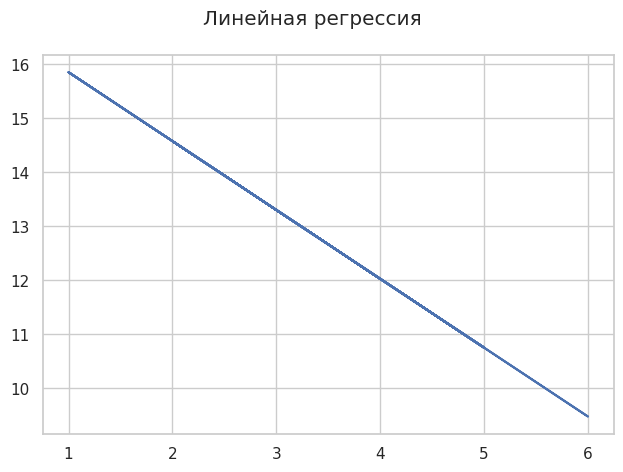

In [55]:
y_pred = model.predict(X)
plt.plot(X, y_pred)
plt.suptitle('Линейная регрессия')
plt.tight_layout()

**Модель хорошо описывает зависимость данных.**

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить растояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить этот факт.

Оценка параметра $\sigma^2$:

$$s^2 = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat\beta)}{n-r}$$

In [56]:
S2 = RSS/(n-np.linalg.matrix_rank(X_1))
div = Y - y_pred
div = np.sort(div)
print("Несмещенная оценка дисперсии", S2)

Несмещенная оценка дисперсии 25.563089354674798


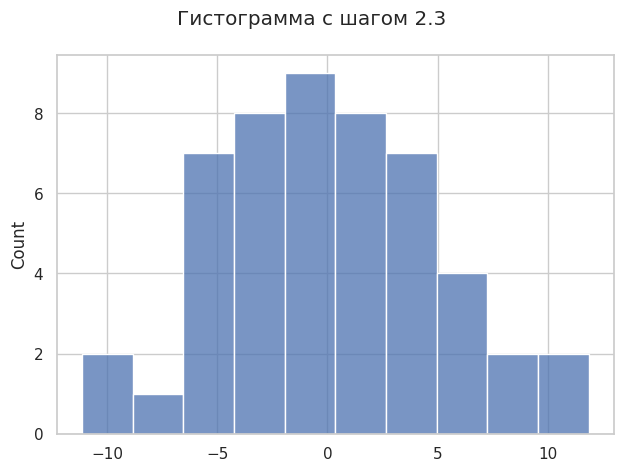

In [57]:
sns.histplot(div, binwidth=h)
plt.suptitle('Гистограмма с шагом 2.3')
plt.tight_layout()

Проверка гипотезы нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$

In [58]:
n_i = n/4
intervals = [[-12,-4.60114634], [-4.60114634,-0.94041463], [-0.94041463,0.97421951], [0.97421951,12]]
x_mean = [(intervals[0][0]+intervals[0][1])/2, (intervals[1][0]+intervals[1][1])/2, (intervals[2][0]+intervals[2][1])/2,
         (intervals[3][0]+intervals[3][1])/2] # середины интервалов
xn = np.multiply(x_mean,n_i)
x2n = np.multiply(np.square(x_mean),n_i)
xn_mean = np.sum(xn)/n
x2n_mean = np.sum(x2n)/n
var = x2n_mean - xn_mean**2
s = np.sqrt(var*(n/(n-1)))

Lapl_intervals =  [[-np.inf,(intervals[0][1]-xn_mean)/s],
                  [(intervals[1][0]-xn_mean)/s,(intervals[1][1]-xn_mean)/s],
                  [(intervals[2][0]-xn_mean)/s,(intervals[2][1]-xn_mean)/s],
                  [(intervals[3][0]-xn_mean)/s,(intervals[3][1]-xn_mean)/s]]

In [59]:
Lapl_intervals

[[-inf, -0.6430444294974352],
 [-0.6430444294974352, 0.03744169939131574],
 [0.03744169939131574, 0.3933492275523574],
 [0.3933492275523574, 2.4429096100085785]]

In [60]:
z_i = [[sp.stats.norm.cdf(-np.inf), sp.stats.norm.cdf((intervals[0][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[1][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[1][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[2][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[2][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[3][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[3][1]-xn_mean)/s)]]

p_i = ([z_i[0][1] - z_i[0][0], z_i[1][1] -z_i [1][0], z_i[2][1] - z_i[2][0], z_i[3][1] - z_i[3][0]])
p_i

[0.26009763556219,
 0.2548359521084882,
 0.13803563031664967,
 0.33974608909998316]

In [61]:
p_i = np.round(np.multiply(p_i,n),3)
p_i

array([13.005, 12.742,  6.902, 16.987])

In [62]:
chi = 0
for i in range(len(p_i)):
    chi += (n_i-p_i[i])**2/p_i[i]
print('хи практический:', chi)
print("хи теоретический:", sp.stats.chi2.ppf(1 - alpha, df = 4-2))

хи практический: 5.7497819915178905
хи теоретический: 7.824046010856292


### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $\left(\beta_0, \beta_1\right)$ (вычислить его полуоси).

**Доверительный  интервал для  параметра $\beta_0$:**

**Линейная функция параметра: $\psi(\beta) = C^\intercal \beta = \beta_0$**

Тогда $C = (1, 0)^\intercal$

**ДНО функция:**

$\psi(\beta) = C^\intercal \beta$

**МНК функция:**

$\psi(\beta) = C^\intercal \widehat\beta$

Тогда **МНК оценка** равна $\widehat{\psi} = \widehat{\beta}_0$

**Доверительный интервал** имеет вид: $\left[\widehat{\psi} - x_\alpha S \sqrt{b_\psi}; \widehat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [63]:
r = np.linalg.matrix_rank(X_1)
x_alpha = sp.stats.t.ppf(1 - alpha/2, df = 50 - r)
C = np.matrix([[1], [0]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1, X_1.T))), C))
print("x_alpha = ", x_alpha)
print("left = ", betta[0] - x_alpha * np.sqrt(S2) * np.sqrt(b_psi))
print("right = ", betta[0] + x_alpha * np.sqrt(S2) * np.sqrt(b_psi))

x_alpha =  2.4065812732756067
left =  [12.24536231]
right =  [22.00912549]


**Таким образом, ДИ уровня значимости $\alpha = 0.02$ для $\beta_0 = 17.127$:**

$$\left[12.245, 22.009\right] \ni \beta_0$$

**Доверительный  интервал для  параметра $\beta_1$:**

**Линейная функция параметра: $\psi(\beta) = C^\intercal \beta = \beta_1$**

Тогда $C = (0, 1)^\intercal$

**ДНО функция:**

$\psi(\beta) = C^\intercal \beta$

**МНК функция:**

$\psi(\beta) = C^\intercal \widehat\beta$

Тогда **МНК оценка** равна $\widehat{\psi} = \widehat{\beta}_1$

**Доверительный интервал** имеет вид: $\left[\widehat{\psi} - x_\alpha S \sqrt{b_\psi}; \widehat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [64]:
C = np.matrix([[0], [1]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1, X_1.T))), C))
print("x_alpha = ", x_alpha)
print("left = ", betta[1] - x_alpha * np.sqrt(S2) * np.sqrt(b_psi))
print("right = ", betta[1] + x_alpha * np.sqrt(S2) * np.sqrt(b_psi))


x_alpha =  2.4065812732756067
left =  [-2.61905954]
right =  [0.06832783]


**Таким образом, ДИ уровня значимости $\alpha = 0.02$ для $\beta_1 = -1.275$:**

$$\left[-2.619, 0.068\right] \ni \beta_1$$

**Доверительный эллипс для параметра $(\beta_0, \beta_1)$:**

**Линейная функция параметра:** $\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$

Тогда **МНК оценка** равна $\widehat{\psi} = (\widehat{\beta}_0, \widehat{\beta}_1)^\intercal$

**Доверительный эллипс** имеет вид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [65]:
C = np.matrix([[1, 0], [0, 1]])

b_psi = np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1, X_1.T))), C)
print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
print("x_alpha = ", x_alpha)

x_sym = sympy.Symbol('x')
y_sym = sympy.Symbol('y')

axis_vec = np.matrix([[x_sym], [y_sym]])
expr = (axis_vec - betta).T * np.linalg.inv(b_psi) * (axis_vec - betta)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {2 * S2 * x_alpha}")

Определитель матрицы b_psi =  0.00024390243902439033
x_alpha =  2.4065812732756067
Неравенство имеет вид: 50.0*x**2 + 340.0*x*y - 1279.1*x + 660.0*y**2 - 4139.78*y + 8313.8618109756 <= 123.03930425606276


In [66]:
b_1_arr = np.arange(n)
b_1_arr = np.full_like(b_1_arr, betta[1])
cov = np.cov(np.column_stack((div, b_1_arr)))

e_val, e_vec = np.linalg.eig(cov)

ax_0 = np.sqrt(e_val[0] * sps.chi2.ppf(1 - alpha/2, 2))
ax_1 = np.sqrt(e_val[1] * sps.chi2.ppf(1 -  alpha/2, 2))

print(ax_0, ax_1)

0j (76.68723885548694+0j)


### 4. Сформулировать гипотезу независимости переменной  $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза:$ H_0 : \psi = 0$

$ F - статистика: \mathbb{F} = \frac{\frac{SS_H}{q}}{\frac{SSe}{n-r}}$

$s^2 = \frac{SSe}{n-r}$

В итоге: $\mathbb{F} = \frac{{SS_H}}{S^2 \cdot \mathrm{rank(X)}} $

In [67]:
b_h = np.array([Y.mean(),0])
F = (np.sum((Y - np.matmul(X_1.T, b_h))**2) -RSS )/(S2 * 2)
F_crit = sps.f.ppf(1 - alpha, r, 50 - r)
print("F = ",F)
print("x_alpha = ", F_crit)

F =  2.6087958134688174
x_alpha =  4.248907630769176


$F < x_{\alpha}$, значит линейная зависимость отсутсвует.

### 5. Сформулировать модель, включающую дополнительный член $X^2$. Построить МНК оценки параметров $\beta_0$,$\beta_1$,$\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

In [68]:
X_1_1 = np.vstack([np.ones(n), X.transpose(),X.transpose()**2]).astype('int')

model_1 = LinearRegression()
model_1.fit(X_1_1.T, Y)
y_pred_1 = model_1.predict(X_1_1.T)
betta0_1= model_1.intercept_
betta1_1 = model_1.coef_

betta1 = [betta0_1, betta1_1[1], betta1_1[2]]

**Решение системы нормальных уравнений в регулярном случае**

$$\widehat\beta = \left(X X^{\intercal} \right)^{-1} XY$$

In [69]:
XY_1 = np.matmul(X_1_1, Y)
XXT_1 = np.matmul(X_1_1, X_1_1.T)
XXT1_1 = np.linalg.inv(XXT_1)
XXT1XY_1 = np.matmul(XXT1_1, XY_1)
print('betta с крышкой = ', XXT1XY_1)

betta с крышкой =  [16.5091721  -0.84799219 -0.06325747]


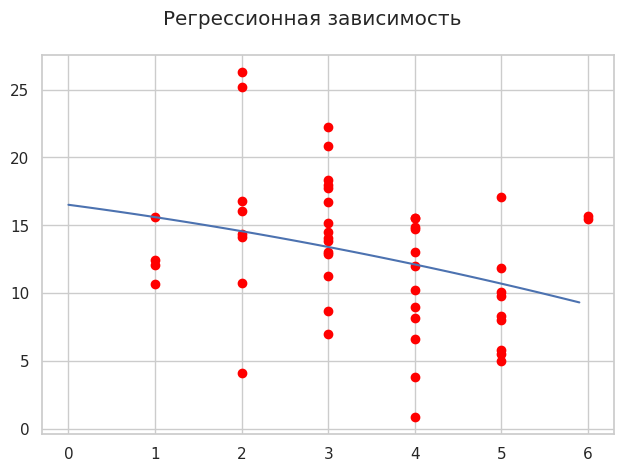

In [70]:
x = np.arange(0,6,0.1)
y = XXT1XY_1[0] + XXT1XY_1[1]*x + XXT1XY_1[2]*x**2

plt.plot(x,y)
plt.scatter(X, Y, color = "red")
plt.suptitle('Регрессионная зависимость')
plt.tight_layout()

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

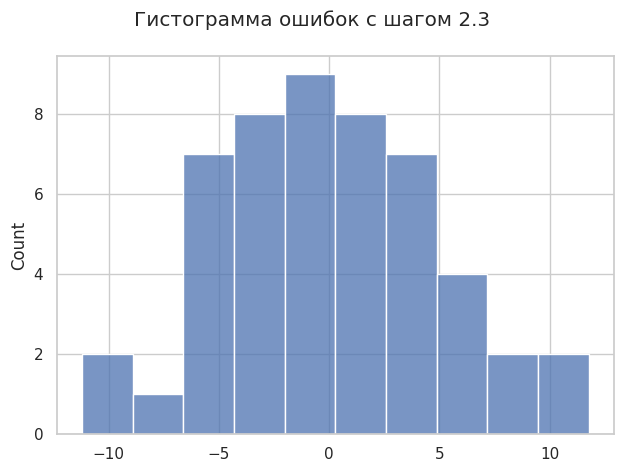

In [71]:
RSS_1 = np.sum((Y - y_pred_1)**2)
S2_1 = RSS/(n-np.linalg.matrix_rank(X_1_1))
div_1 = Y - y_pred_1
sns.histplot(div_1, binwidth=h)
plt.suptitle('Гистограмма ошибок с шагом 2.3')
plt.tight_layout()

In [72]:
div_1 = np.sort(div_1)

In [73]:
intervals = [[-12,-4.69587827], [-4.69587827,-0.87777431], [-0.87777431,0.89491624], [0.89491624,12]]
x_mean = [(intervals[0][0]+intervals[0][1])/2, (intervals[1][0]+intervals[1][1])/2, (intervals[2][0]+intervals[2][1])/2,
         (intervals[3][0]+intervals[3][1])/2] # середины интервалов
xn = np.multiply(x_mean,n_i)
x2n = np.multiply(np.square(x_mean),n_i)
xn_mean = np.sum(xn)/n
x2n_mean = np.sum(x2n)/n
var = x2n_mean - xn_mean**2
s = np.sqrt(var*(n/(n-1)))

Lapl_intervals =  [[-np.inf,(intervals[0][1]-xn_mean)/s],
                  [(intervals[1][0]-xn_mean)/s,(intervals[1][1]-xn_mean)/s],
                  [(intervals[2][0]-xn_mean)/s,(intervals[2][1]-xn_mean)/s],
                  [(intervals[3][0]-xn_mean)/s,(intervals[3][1]-xn_mean)/s]]

In [74]:
z_i_1 = [[sp.stats.norm.cdf(-np.inf), sp.stats.norm.cdf((intervals[0][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[1][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[1][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[2][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[2][1]-xn_mean)/s)],
      [sp.stats.norm.cdf((intervals[3][0]-xn_mean)/s), sp.stats.norm.cdf((intervals[3][1]-xn_mean)/s)]]

p_i_1 = ([z_i_1[0][1] - z_i_1[0][0], z_i_1[1][1] -z_i_1 [1][0], z_i_1[2][1] - z_i_1[2][0], z_i_1[3][1] - z_i_1[3][0]])
p_i_1

[0.2561798529477346,
 0.2654469418967128,
 0.1277369565417118,
 0.3434323245353238]

In [75]:
p_i_1 = np.round(np.multiply(p_i_1,n),3)
p_i_1

array([12.809, 13.272,  6.387, 17.172])

In [76]:
chi = 0
for i in range(len(p_i_1)):
    chi += (n_i-p_i_1[i])**2/p_i_1[i]
print('хи практический:', chi)
print("хи теоретический:", sp.stats.chi2.ppf(1 - alpha, df = 4-3))

хи практический: 7.174228915999166
хи теоретический: 5.411894431054342


**Гипотезу отвергаем**

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$,$\beta_1$,$\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

**Доверительный  интервал для  параметра $\beta_0$:**

**Линейная функция параметра: $\psi = C^\intercal \beta = \beta_0$**

Тогда $C = (1, 0, 0)^\intercal$

Тогда **МНК оценка** равна $\widehat{\psi} = \widehat{\beta}_0$

**Доверительный интервал** имеет вид: $\left[\widehat{\psi} - x_\alpha S \sqrt{b_\psi}; \widehat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [77]:
r = np.linalg.matrix_rank(X_1_1)
x_alpha = sp.stats.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0], [0]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C))
print("x_alpha = ", x_alpha)
print("left = ", XXT1XY_1[0] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print("right = ", XXT1XY_1[0] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
XXT1XY_1

x_alpha =  2.408345050443425
left =  6.301861088458807
right =  26.71648310760935


array([16.5091721 , -0.84799219, -0.06325747])

**Таким образом, ДИ уровня значимости $\alpha = 0.02$ для $\beta_0 = 16.509$:**

$$\left[6.301, 26.716\right] \ni \beta_0$$

**Доверительный  интервал для  параметра $\beta_1$:**

**Линейная функция параметра: $\psi = C^\intercal \beta = \beta_1$**

Тогда $C = (0, 1, 0)^\intercal$

Тогда **МНК оценка** равна $\widehat{\psi} = \widehat{\beta}_1$

**Доверительный интервал** имеет вид: $\left[\widehat{\psi} - x_\alpha S \sqrt{b_\psi}; \widehat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [78]:
C = np.matrix([[0], [1], [0]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C))
print("x_alpha = ", x_alpha)
print("left = ", XXT1XY_1[1] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print("right = ", XXT1XY_1[1] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))

x_alpha =  2.408345050443425
left =  -7.173116968679434
right =  5.477132589471379


**Таким образом, ДИ уровня значимости $\alpha = 0.02$ для $\beta_1 = -0.848$:**

$$\left[-7.173, 5.477\right] \ni \beta_1$$

**Доверительный  интервал для  параметра $\beta_2$:**

**Линейная функция параметра: $\psi = C^\intercal \beta = \beta_2$**

Тогда $C = (0, 0, 1)^\intercal$

Тогда **МНК оценка** равна $\widehat{\psi} = \widehat{\beta}_2$

**Доверительный интервал** имеет вид: $\left[\widehat{\psi} - x_\alpha S \sqrt{b_\psi}; \widehat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [79]:
C = np.matrix([[0], [0], [1]])
b_psi = float(np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C))
print("x_alpha = ", x_alpha)
print("left = ", XXT1XY_1[2] - x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))
print("right = ", XXT1XY_1[2] + x_alpha * np.sqrt(S2_1) * np.sqrt(b_psi))

x_alpha =  2.408345050443425
left =  -0.9776054843799452
right =  0.8510905368981053


**Таким образом, ДИ уровня значимости $\alpha = 0.02$ для $\beta_2 = -0.063$:**

$$\left[-0.978,  0.851\right] \ni \beta_2$$

**Доверительный эллипс для параметра $(\beta_0, \beta_1, \beta_2)$:**

**Линейная функция параметра:** $\psi = C^\intercal \beta = (\beta_0, \beta_1, \beta_2)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 & 0\\0 & 1 & 0\\ 0 & 0 & 1 \end{pmatrix}$

Тогда **МНК оценка** равна $\hat{\psi} = (\widehat{\beta}_0, \widehat{\beta}_1)^\intercal$

**Доверительный эллипс** имеет вид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \widehat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \widehat{\psi}\right) \le q S^2 x_\alpha\right\}$,

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [80]:
C = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

b_psi = np.matmul(np.matmul(C.T, np.linalg.inv(np.matmul(X_1_1, X_1_1.T))), C)
print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
print("x_alpha = ", x_alpha)

x_sym = sympy.Symbol('x')
y_sym = sympy.Symbol('y')
z_sym = sympy.Symbol('z')
axis_vec = np.matrix([[x_sym], [y_sym], [z_sym]])
expr = (axis_vec - betta1).T * np.linalg.inv(b_psi) * (axis_vec - betta1)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {2 * S2_1 * x_alpha}")

Определитель матрицы b_psi =  1.3466199838405478e-06
x_alpha =  2.408345050443425
Неравенство имеет вид: 49.9999999999998*x**2 + 339.999999999999*x*y + 1320.0*x*z - 29056.1428925396*x + 659.999999999999*y**2 + 5595.99999999999*y*z - 119790.552743334*y + 12636.0*z**2 - 531397.231491516*z + 5615132.03079426 <= 125.74925560110447


In [81]:
b_1_arr_1 = np.arange(n)
b_1_arr_1 = np.full_like(b_1_arr_1, betta1[1])

cov = b_psi
e_val, e_vec = np.linalg.eig(cov)

ax_0 = np.sqrt(e_val[0] * sps.chi2.ppf(1 - alpha/2, 2))
ax_1 = np.sqrt(e_val[1] * sps.chi2.ppf(1 -  alpha/2, 2))
ax_2 = np.sqrt(e_val[2] * sps.chi2.ppf(1 -  alpha/2, 2))

print(ax_0, ax_1, ax_2)

2.94028101945419 0.41909515318703106 0.026322950611420873


### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.

Основная гипотеза:$ H_0 : \psi = 0$

$ F - статистика: \mathbb{F} = \frac{\frac{SS_H}{q}}{\frac{SSe}{n-r}}$

$s^2 = \frac{SSe}{n-r}$

В итоге: $\mathbb{F} = \frac{{SS_H}}{S^2 \cdot \mathrm{rank(X)}} $

In [82]:
b_h = np.array([ betta0_1, betta1_1[1], betta1_1[2]])
F = np.sum((betta1[0] + betta1[1] * X + betta1[2] * X ** 2 - np.mean(Y)) ** 2)/(S2_1 * 3)
F_crit = sps.f.ppf(1 - alpha, r, n - r)
print("F = ",F)
print("x_alpha = ", F_crit)

F =  1.7122176633646058
x_alpha =  3.6061455215960643


$F < x_{\alpha}$, значит квадратичная зависимость отсутсвует.

## Выводы

При выполнении практической работы был проведен регрессионный анализ. Построены линейные модели, произведена оценка параметров и исследование их значимости, проверены гипотезы о независимости и линейной регрессионной зависимости, построены оценки нормальности ошибок, доверительные интервалы. Было оценено расстояние полученных оценок до класса нормальных распределений по Колмогорову. Сформулирована гипотеза о независимости переменной Y от переменной X.